# 신경망 모델 훈련

### 손실 곡선


In [17]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [18]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state=42)


In [19]:
def model_fn(a_layer=None):
    model =keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [20]:
model = model_fn()
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               78500     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
histroy = model.fit(train_scaled, train_target, epochs=5, verbose=2)

print(histroy.history.keys())

Epoch 1/5
1500/1500 - 1s - loss: 0.5287 - accuracy: 0.8134 - 1s/epoch - 967us/step
Epoch 2/5
1500/1500 - 1s - loss: 0.3894 - accuracy: 0.8601 - 1s/epoch - 748us/step
Epoch 3/5
1500/1500 - 1s - loss: 0.3520 - accuracy: 0.8737 - 1s/epoch - 743us/step
Epoch 4/5
1500/1500 - 1s - loss: 0.3296 - accuracy: 0.8810 - 1s/epoch - 749us/step
Epoch 5/5
1500/1500 - 1s - loss: 0.3187 - accuracy: 0.8860 - 1s/epoch - 752us/step
dict_keys(['loss', 'accuracy'])


In [22]:
print(histroy.history.keys())

dict_keys(['loss', 'accuracy'])


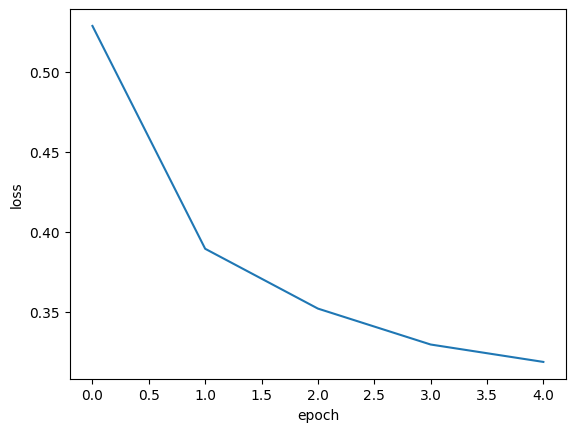

In [23]:
plt.plot(histroy.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

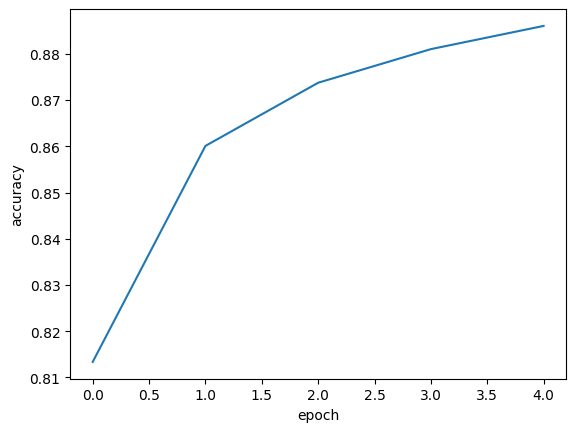

In [24]:
plt.plot(histroy.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()


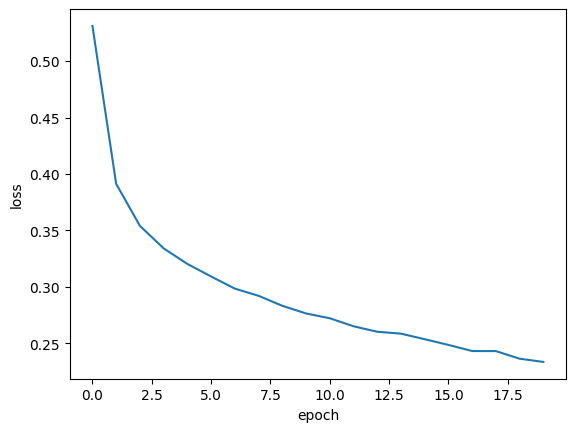

In [25]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [26]:
#검증 손실
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


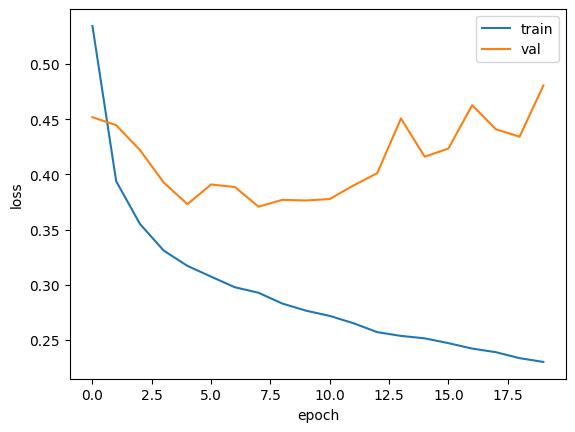

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()


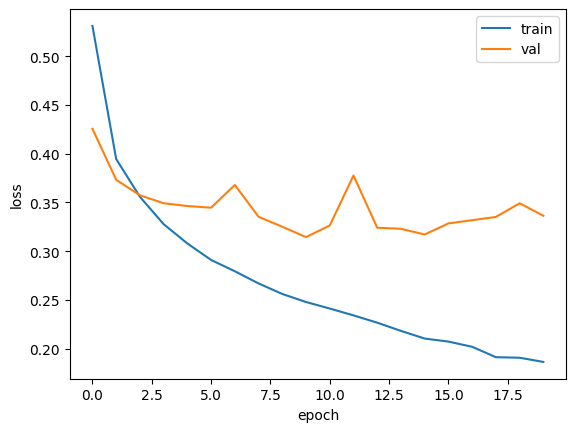

In [28]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### 드롭아웃
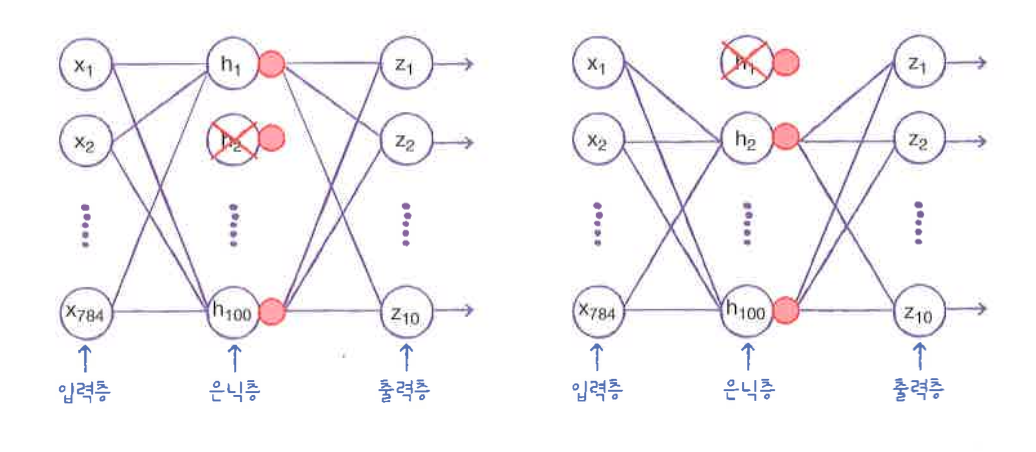

위 그림처럼 훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서(즉 뉴런의 출력을 0으로 만들어) 과대적합을 막습니다.

훈련이 끝난 뒤에 평가나 예측을 수행할 때는 드롭아웃을 적용하지 말아야 합니다.

텐서플로와 케라스 모두 모델을 평가, 예측 할 때는 드롭아웃을 적용하지 않습니다.

In [29]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 100)               78500     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_19 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


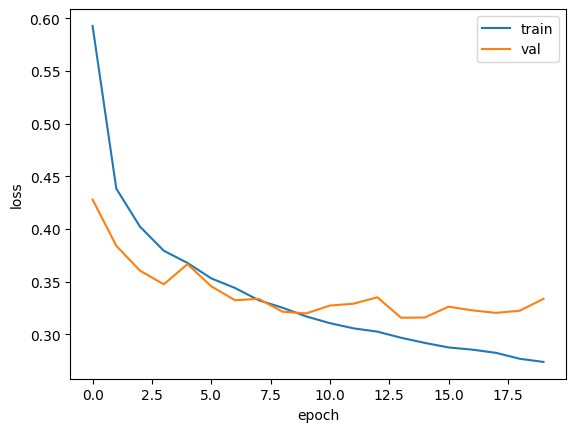

In [30]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose=0, validation_data = (val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [31]:
##모델 저장과 복원
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=10, verbose=0,
                    validation_data=(val_scaled, val_target))

In [32]:
model.save_weights('model-weights.h5')
model.save('model-whole.h5')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [33]:
model = model_fn(keras.layers.Dropout(0.3))

model.load_weights('model-weights.h5')

In [34]:
import numpy as np

val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

375/375 [==============================] - 0s 632us/step
0.8843333333333333


In [35]:
model = keras.models.load_model('model-whole.h5')

model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 550us/step - loss: 0.3240 - accuracy: 0.8843


[0.3239864408969879, 0.8843333125114441]

### 콜백
ModelCheckpoint 콜백은 기본적으로 최상의 검증 점수를 만드는 모델을 저장합니다.

### 조기 종료(Early Stopping)
과대적합이 시작되기 전에 훈련을 미리 중지하는 방법입니다.

컴퓨터 자원과 시간을 아낄 수 있는 장점이 있습니다.

In [36]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                save_best_only=True)

model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

In [37]:
model = keras.models.load_model('best-model.h5')

model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 544us/step - loss: 0.3234 - accuracy: 0.8844


[0.32344937324523926, 0.8844166398048401]

In [38]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

patiece를 2로 지정하면 2번 연속 검증 점수가 향상되지 않으면 훈련을 중지 합니다.

restore_best_weight 매개변수를 True로 지정하면 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌립니다.

EarlyStopping 콜백을 ModelCheckpoint 콜백과 함께 사용하면 가장 낮은 검증 손실의 모델을 파일에 저장하고 검증 손실이 다시 상승할 때 훈련을 중지할 수 있습니다.

In [39]:
print(early_stopping_cb.stopped_epoch)

5


몇 번째 에포크에서 훈련이 중지되었는지 확인할 수 있습니다.

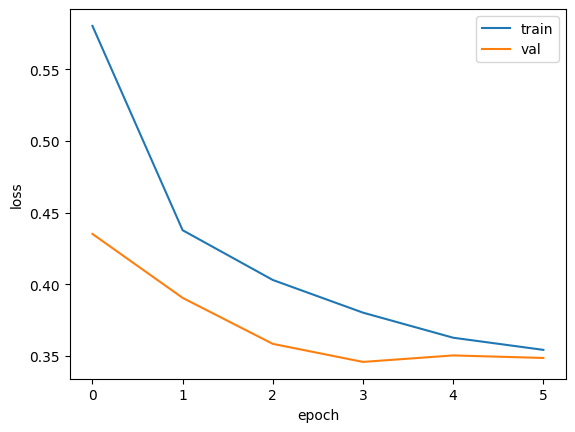

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [42]:
#조기 종료로 얻은 모델을 사용해 검증 세트에 대한 성능 확인
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 692us/step - loss: 0.3458 - accuracy: 0.8748


[0.34579500555992126, 0.874750018119812]